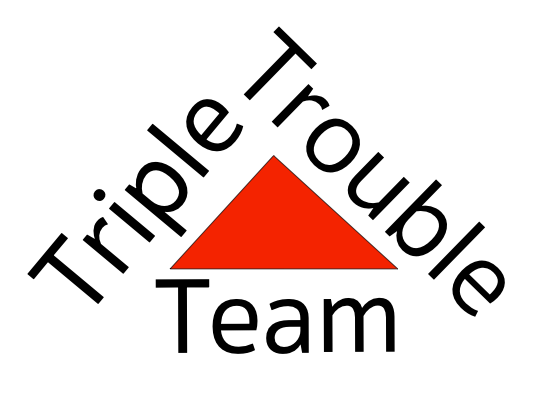
# Data Science Bootcamp Project 2
# Team Triple Trouble
- ## Nurmaa  Dashzeveg</li>
- ## Wayne Mitchell</li>
- ## Ben Schatz</li>
# 12-2-2024

## Summary
#### The team successfully performed the three required tasks:
- A) CROWDFUNDING: imported crowdfunding.xlsx data into 'crowdfunding_info_df', then cleaned, remodeled and parsed it into three new dataframes ('category_df', 'subcategory_df' and 'campaign_df') and  exported the three new dataframes to csv files;
- B) CONTACTS: imported contacts.xlsx data, and created, cleaned and remodeled a contacts dataframe by two methods, using a pandas strategy and using a regex strategy. The resulting csv files, contacts_1.csv (from the pandas arm) and contacts_2.csv (from the regex arm) were compared and are identical;
- C) DATABASE: designed a four table PostgreSQL schema to accomodate the four csv files, instantiated a database by importing the csv file data and confirmed the integrity of the database tables by performing SELECT* operations on each table.
#### The team also implemented a function to scan and report dataframe columns for non-alpha-numeric characters, and extracted the email service providers from contact email address and graphed the frequency of providers with more than 5 customers.

### Deliverables
The github repo for this project contains a directory and one subdirectories. The main directory has 
- #### the final jupyter notebook: 'ETL_Min_Projewct_NDashzeveg_WMitchell_Ben_Schatz'. The subdirectory 'Extra
- #### the csv files generated
  - #### category.csv
  - #### subcategory.csv
  - #### campaign.csv
  - #### contacts_1.csv (made with a pandas strategy)
  - #### contacts_2.csv (made with a regex strategy)
- #### Crowdfunding_Select_db.sql
- #### Service Provider Share.png (a bar graph)
- #### a README file
- #### a .gitignore file
#### The Resourses subdirectory has input .xlsx files:
 - #### crowdfunding.xlsx
 - #### contacts.xlsx
***
### Preliminary

#### Imports
#### We import 'pandas' and 'numpy' for pandas dataframe manipulation, 're' for regular expression capabilities,'datetime' for  datetime formating, and matplotlib for graphing. We apply 'pd.set_option('max_col_width', 400)' to ensure capture of all spreadsheet data.

In [23]:
# Import dependencies
import pandas as pd
import numpy as np
import re
from datetime import datetime as dt
import matplotlib.pyplot as plt
pd.set_option('max_colwidth', 400)

#### Functions. 
#### Note: We embedded the function declaration later in the notebook to smooth the presentation. Function declarations normally would go here. 

### __CROWDFUNDING__
### Extract the crowdfunding.xlsx data
#### Use the 'read_excel()' function to read the spreadsheet data into the pandas dataframe 'crowdfunding_info_df', and then inspect the result with '.head()' and '.info()'.

In [27]:
# Read the data into a Pandas DataFrame
crowdfunding_info_df = pd.read_excel('Resources/crowdfunding.xlsx')
crowdfunding_info_df.head()

,cf_id,contact_id,company_name,blurb,goal,pledged,outcome,backers_count,country,currency,launched_at,deadline,staff_pick,spotlight,category & sub-category
0,147,4661,"Baldwin, Riley and Jackson",Pre-emptive tertiary standardization,100,0,failed,0,CA,CAD,1581573600,1614578400,False,False,food/food trucks
1,1621,3765,Odom Inc,Managed bottom-line architecture,1400,14560,successful,158,US,USD,1611554400,1621918800,False,True,music/rock
2,1812,4187,"Melton, Robinson and Fritz",Function-based leadingedge pricing structure,108400,142523,successful,1425,AU,AUD,1608184800,1640844000,False,False,technology/web
3,2156,4941,"Mcdonald, Gonzalez and Ross",Vision-oriented fresh-thinking conglomeration,4200,2477,failed,24,US,USD,1634792400,1642399200,False,False,music/rock
4,1365,2199,Larson-Little,Proactive foreground core,7600,5265,failed,53,US,USD,1608530400,1629694800,False,False,theater/plays


In [29]:
# Get a brief summary of the crowdfunding_info DataFrame.
crowdfunding_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   cf_id                    1000 non-null   int64 
 1   contact_id               1000 non-null   int64 
 2   company_name             1000 non-null   object
 3   blurb                    1000 non-null   object
 4   goal                     1000 non-null   int64 
 5   pledged                  1000 non-null   int64 
 6   outcome                  1000 non-null   object
 7   backers_count            1000 non-null   int64 
 8   country                  1000 non-null   object
 9   currency                 1000 non-null   object
 10  launched_at              1000 non-null   int64 
 11  deadline                 1000 non-null   int64 
 12  staff_pick               1000 non-null   bool  
 13  spotlight                1000 non-null   bool  
 14  category & sub-category  1000 non-null   

***
### Goal 1a: Create the Category and Subcategory DataFrames

**Create a Category DataFrame that has the following columns:**
- A "category_id" column that is numbered sequential form 1 to the length of the number of unique categories.
- A "category" column that has only the categories.

Export the DataFrame as a `category.csv` CSV file.

**Create a SubCategory DataFrame that has the following columns:**
- A "subcategory_id" column that is numbered sequential form 1 to the length of the number of unique subcategories.
- A "subcategory" column that has only the subcategories. 

Export the DataFrame as a `subcategory.csv` CSV file.

***

#### We use '.columns' to extract and inspect the column names in 'crowdfunding_info_df'

In [33]:
# Get the crowdfunding_info_df columns.
columns = crowdfunding_info_df.columns
columns

Index(['cf_id', 'contact_id', 'company_name', 'blurb', 'goal', 'pledged',
       'outcome', 'backers_count', 'country', 'currency', 'launched_at',
       'deadline', 'staff_pick', 'spotlight', 'category & sub-category'],
      dtype='object')

#### We stringify the crowdfunding_info_df["category & sub-category"] column with '.str', then split on '/' with '.split('/',n=1, expand = True)'. The 'n=1'parameter restricts the output returned to one single split operation; 'expand=True' exports the output of split to the newly created  'category' and 'subcategory' columns. We then remove the 'category & sub-category' column with '.drop(columns = ["category & sub-category"])'. Finally, we inspect the result with '.head()'

In [36]:
# Assign the category and subcategory values to category and subcategory columns.
crowdfunding_info_df[["category", "subcategory"]] = crowdfunding_info_df ["category & sub-category"].str.split('/', n=1, expand = True)
crowdfunding_clean_df = crowdfunding_info_df.drop(columns = ["category & sub-category"])
crowdfunding_clean_df.head()

,cf_id,contact_id,company_name,blurb,goal,pledged,outcome,backers_count,country,currency,launched_at,deadline,staff_pick,spotlight,category,subcategory
0,147,4661,"Baldwin, Riley and Jackson",Pre-emptive tertiary standardization,100,0,failed,0,CA,CAD,1581573600,1614578400,False,False,food,food trucks
1,1621,3765,Odom Inc,Managed bottom-line architecture,1400,14560,successful,158,US,USD,1611554400,1621918800,False,True,music,rock
2,1812,4187,"Melton, Robinson and Fritz",Function-based leadingedge pricing structure,108400,142523,successful,1425,AU,AUD,1608184800,1640844000,False,False,technology,web
3,2156,4941,"Mcdonald, Gonzalez and Ross",Vision-oriented fresh-thinking conglomeration,4200,2477,failed,24,US,USD,1634792400,1642399200,False,False,music,rock
4,1365,2199,Larson-Little,Proactive foreground core,7600,5265,failed,53,US,USD,1608530400,1629694800,False,False,theater,plays


#### Here we filter for unique categories and subcategories with '.unique()', then coerce the output to lists with '.tolist()' and check the result by printing the newly created 'categories' and 'subcategories' lists. 

In [39]:
# Get the unique categories and subcategories in separate lists.
categories = crowdfunding_clean_df['category'].unique().tolist()
subcategories = crowdfunding_clean_df['subcategory'].unique().tolist()
print(categories)
print(subcategories)

['food', 'music', 'technology', 'theater', 'film & video', 'publishing', 'games', 'photography', 'journalism']
['food trucks', 'rock', 'web', 'plays', 'documentary', 'electric music', 'drama', 'indie rock', 'wearables', 'nonfiction', 'animation', 'video games', 'shorts', 'fiction', 'photography books', 'radio & podcasts', 'metal', 'jazz', 'translations', 'television', 'mobile games', 'world music', 'science fiction', 'audio']


#### We use the function 'len()' to count the number of uniques categories and subcategories,and print the result for inspection. There are 9 unique categories and 24 unique subcategories

In [42]:
# Get the number of distinct values in the categories and subcategories lists.
print(len(categories))
print(len(subcategories))

9
24


#### Numpy ',arange() returns evenly spaced values within an interval. Here we create two arrays of consequtive integers with lengths corresponding to the number of categories or subcategories;  these will be used to construct id strings in the next step

In [45]:
# Create numpy arrays from 1-9 for the categories and 1-24 for the subcategories.
category_ids = np.arange(1, 10)
subcategory_ids = np.arange(1, 25)

print(category_ids)
print(subcategory_ids)

[1 2 3 4 5 6 7 8 9]
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]


#### Using a list comprehension we loop through the arrays  just created, concatenating 'cat' or 'subcat' to each numeral from the array.

In [48]:
# Use a list comprehension to add "cat" to each category_id. 
cat_ids = [f"cat{category_id}" for category_id in category_ids]

# Use a list comprehension to add "subcat" to each subcategory_id.    
scat_ids = [f"subcat{subcategory_id}" for subcategory_id in subcategory_ids]

## Another list comprehension method
#cat_ids = ['cat' + str(value) for value in category_ids]
#scat_ids = ['subcat' + str(value) for value in subcategory_ids ]

print(cat_ids)
print(scat_ids)

['cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7', 'cat8', 'cat9']
['subcat1', 'subcat2', 'subcat3', 'subcat4', 'subcat5', 'subcat6', 'subcat7', 'subcat8', 'subcat9', 'subcat10', 'subcat11', 'subcat12', 'subcat13', 'subcat14', 'subcat15', 'subcat16', 'subcat17', 'subcat18', 'subcat19', 'subcat20', 'subcat21', 'subcat22', 'subcat23', 'subcat24']


#### We create dictionaries using the cat_ids list and scat_ids list as values then apply pd.DataFrame() on the dictionaries to create two dataframes:
- #### category_df
- #### subcategory_df
#### We display the new dataframes for inspection

In [51]:
# Create a category DataFrame with the category_id array as the category_id and categories list as the category name.
category_df = pd.DataFrame({"category_id":cat_ids, "category": categories}) 
# Create a category DataFrame with the subcategory_id array as the subcategory_id and subcategories list as the subcategory name. 
subcategory_df = pd.DataFrame({"subcategory_id":scat_ids, "subcategory": subcategories}) 

In [53]:
category_df

,category_id,category
0,cat1,food
1,cat2,music
2,cat3,technology
3,cat4,theater
4,cat5,film & video
5,cat6,publishing
6,cat7,games
7,cat8,photography
8,cat9,journalism


In [55]:
subcategory_df

,subcategory_id,subcategory
0,subcat1,food trucks
1,subcat2,rock
2,subcat3,web
3,subcat4,plays
4,subcat5,documentary
5,subcat6,electric music
6,subcat7,drama
7,subcat8,indie rock
8,subcat9,wearables
9,subcat10,nonfiction


#### We export 'category_df' and 'subcategory_df' to csv files using '.to_csv'

In [58]:
# Export categories_df and subcategories_df as CSV files.
category_df.to_csv("Resources/category.csv", index=False)

subcategory_df.to_csv("Resources/subcategory.csv", index=False)

***
### Goal 1b.: Campaign DataFrame

Goal: Create a Campaign DataFrame that has the following columns:**
- The "cf_id" column.
- The "contact_id" column.
- The “company_name” column.
- The "blurb" column is renamed as "description."
- The "goal" column.
- The "goal" column is converted to a `float` datatype.
- The "pledged" column is converted to a `float` datatype. 
- The "backers_count" column. 
- The "country" column.
- The "currency" column.
- The "launched_at" column is renamed as "launch_date" and converted to a datetime format. 
- The "deadline" column is renamed as "end_date" and converted to a datetime format.
- The "category_id" with the unique number matching the “category_id” from the category DataFrame. 
- The "subcategory_id" with the unique number matching the “subcategory_id” from the subcategory DataFrame.
- And, create a column that contains the unique four-digit contact ID number from the `contact.xlsx` file.
 

Then export the DataFrame as a `campaign.csv` CSV file.
***

#### Copy 'crowdfunding_info_df' to 'campaign_df' to preserve original

In [62]:
# Create a copy of the crowdfunding_info_df DataFrame named campaign_df. 
campaign_df = crowdfunding_info_df.copy()
campaign_df.head()

,cf_id,contact_id,company_name,blurb,goal,pledged,outcome,backers_count,country,currency,launched_at,deadline,staff_pick,spotlight,category & sub-category,category,subcategory
0,147,4661,"Baldwin, Riley and Jackson",Pre-emptive tertiary standardization,100,0,failed,0,CA,CAD,1581573600,1614578400,False,False,food/food trucks,food,food trucks
1,1621,3765,Odom Inc,Managed bottom-line architecture,1400,14560,successful,158,US,USD,1611554400,1621918800,False,True,music/rock,music,rock
2,1812,4187,"Melton, Robinson and Fritz",Function-based leadingedge pricing structure,108400,142523,successful,1425,AU,AUD,1608184800,1640844000,False,False,technology/web,technology,web
3,2156,4941,"Mcdonald, Gonzalez and Ross",Vision-oriented fresh-thinking conglomeration,4200,2477,failed,24,US,USD,1634792400,1642399200,False,False,music/rock,music,rock
4,1365,2199,Larson-Little,Proactive foreground core,7600,5265,failed,53,US,USD,1608530400,1629694800,False,False,theater/plays,theater,plays


#### Rename three columns uding the .rename() with the old and new names in a dictionary, and parameter 'inplace=True' which renames existing columns instead of adding new columns
- 'blurb' renamed as 'description'
- 'launched_at' column renamed as 'launch_date'
- 'deadline' renamed as 'end_date'

In [65]:
# Rename the blurb, launched_at, and deadline columns.
campaign_df.rename(columns={'blurb': 'description', 'launched_at': 'launched_date', 'deadline': 'end_date'}, inplace=True)

#### Convert the 'goal' and 'pledged' columns to a `float` data type using '.astype(float)'

In [68]:
#Convert the goal and pledged columns to a `float` data type.
campaign_df["goal"] = campaign_df["goal"].astype(float)
campaign_df["pledged"] = campaign_df["pledged"].astype(float)

#### Check the datatypes with '.dtypes'

In [71]:
# Check the datatypes
campaign_df.dtypes

cf_id                        int64
contact_id                   int64
company_name                object
description                 object
goal                       float64
pledged                    float64
outcome                     object
backers_count                int64
country                     object
currency                    object
launched_date                int64
end_date                     int64
staff_pick                    bool
spotlight                     bool
category & sub-category     object
category                    object
subcategory                 object
dtype: object

#### Inspection of the datatypes reveals dates are currently int64 type. Reformat the 'launched_date' and 'end_date' columns to datetime format with '.to_datetime()'.

In [74]:
# Format the launched_date and end_date columns to datetime format
from datetime import datetime as dt
from datetime import datetime as dt
campaign_df["launched_date"] = pd.to_datetime(campaign_df["launched_date"])
campaign_df["end_date"] = pd.to_datetime(campaign_df["end_date"])
campaign_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   cf_id                    1000 non-null   int64         
 1   contact_id               1000 non-null   int64         
 2   company_name             1000 non-null   object        
 3   description              1000 non-null   object        
 4   goal                     1000 non-null   float64       
 5   pledged                  1000 non-null   float64       
 6   outcome                  1000 non-null   object        
 7   backers_count            1000 non-null   int64         
 8   country                  1000 non-null   object        
 9   currency                 1000 non-null   object        
 10  launched_date            1000 non-null   datetime64[ns]
 11  end_date                 1000 non-null   datetime64[ns]
 12  staff_pick               1000 non-n

#### Merge the 'campaign_df' with the 'category_df' and 'the subcategory_df'; use the common 'category' and the 'subcategory' columns for the merge.

In [77]:
# Merge the campaign_df with the category_df on the "category" column and 
# the subcategory_df on the "subcategory" column.
campaign_merged_df1 = campaign_df.merge(category_df, on = 'category', how='right')
campaign_merged_df = campaign_merged_df1.merge(subcategory_df, on = 'subcategory', how = 'right')
campaign_merged_df.tail(10)
campaign_merged_df.tail(10)

,cf_id,contact_id,company_name,description,goal,pledged,outcome,backers_count,country,currency,launched_date,end_date,staff_pick,spotlight,category & sub-category,category,subcategory,category_id,subcategory_id
990,50,3613,Rose-Fuller,Upgradable holistic system engine,10000.0,12042.0,successful,117,US,USD,1970-01-01 00:00:01.632805200,1970-01-01 00:00:01.633323600,False,False,film & video/science fiction,film & video,science fiction,cat5,subcat23
991,1193,3992,"Russo, Kim and Mccoy",Balanced optimal hardware,10000.0,824.0,failed,14,US,USD,1970-01-01 00:00:01.605592800,1970-01-01 00:00:01.632286800,False,False,film & video/science fiction,film & video,science fiction,cat5,subcat23
992,1973,2357,Montgomery-Castro,De-engineered disintermediate encryption,43800.0,13653.0,failed,248,AU,AUD,1970-01-01 00:00:01.611640800,1970-01-01 00:00:01.642485600,False,False,film & video/science fiction,film & video,science fiction,cat5,subcat23
993,175,3264,Davis LLC,Compatible logistical paradigm,4700.0,7992.0,successful,81,AU,AUD,1970-01-01 00:00:01.629608400,1970-01-01 00:00:01.634014800,False,False,film & video/science fiction,film & video,science fiction,cat5,subcat23
994,1994,4093,Boyle Ltd,Streamlined fault-tolerant conglomeration,3300.0,1980.0,failed,21,US,USD,1970-01-01 00:00:01.615096800,1970-01-01 00:00:01.630904400,False,True,film & video/science fiction,film & video,science fiction,cat5,subcat23
995,1475,2813,Wood Inc,Re-engineered composite focus group,187600.0,35698.0,failed,830,US,USD,1970-01-01 00:00:01.597640400,1970-01-01 00:00:01.628139600,False,False,film & video/science fiction,film & video,science fiction,cat5,subcat23
996,1095,3565,Young and Sons,Innovative disintermediate encryption,2400.0,4596.0,successful,144,US,USD,1970-01-01 00:00:01.606543200,1970-01-01 00:00:01.614492000,False,False,journalism/audio,journalism,audio,cat9,subcat24
997,1388,4517,Valenzuela-Cook,Total incremental productivity,6700.0,7496.0,successful,300,US,USD,1970-01-01 00:00:01.609740000,1970-01-01 00:00:01.633323600,False,False,journalism/audio,journalism,audio,cat9,subcat24
998,2448,2389,Little Ltd,Decentralized bandwidth-monitored ability,6900.0,12155.0,successful,419,US,USD,1970-01-01 00:00:01.611554400,1970-01-01 00:00:01.618722000,False,False,journalism/audio,journalism,audio,cat9,subcat24
999,602,2153,Giles-Smith,Right-sized web-enabled intranet,9700.0,11929.0,successful,331,US,USD,1970-01-01 00:00:01.643695200,1970-01-01 00:00:01.644991200,False,False,journalism/audio,journalism,audio,cat9,subcat24


#### Drop unwanted columns, 'staff_pick', 'spotlight', 'category & sub-category', 'category', 'subcategory' using ',drop()'.

In [80]:
# Drop unwanted columns
campaign_cleaned =  campaign_merged_df.drop(columns=["staff_pick", "spotlight", "category & sub-category", "category", "subcategory"])
campaign_cleaned

,cf_id,contact_id,company_name,description,goal,pledged,outcome,backers_count,country,currency,launched_date,end_date,category_id,subcategory_id
0,147,4661,"Baldwin, Riley and Jackson",Pre-emptive tertiary standardization,100.0,0.0,failed,0,CA,CAD,1970-01-01 00:00:01.581573600,1970-01-01 00:00:01.614578400,cat1,subcat1
1,1175,2288,Werner-Bryant,Virtual uniform frame,1800.0,7991.0,successful,222,US,USD,1970-01-01 00:00:01.592629200,1970-01-01 00:00:01.611986400,cat1,subcat1
2,873,2067,Stewart LLC,Cloned bi-directional architecture,1300.0,12047.0,successful,113,US,USD,1970-01-01 00:00:01.606629600,1970-01-01 00:00:01.623387600,cat1,subcat1
3,2568,5989,Castillo-Carey,Cross-platform solution-oriented process improvement,142400.0,21307.0,failed,296,US,USD,1970-01-01 00:00:01.588654800,1970-01-01 00:00:01.622350800,cat1,subcat1
4,1211,3307,"Wright, Hartman and Yu",User-friendly tertiary array,3300.0,12437.0,successful,131,US,USD,1970-01-01 00:00:01.611900000,1970-01-01 00:00:01.613196000,cat1,subcat1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1475,2813,Wood Inc,Re-engineered composite focus group,187600.0,35698.0,failed,830,US,USD,1970-01-01 00:00:01.597640400,1970-01-01 00:00:01.628139600,cat5,subcat23
996,1095,3565,Young and Sons,Innovative disintermediate encryption,2400.0,4596.0,successful,144,US,USD,1970-01-01 00:00:01.606543200,1970-01-01 00:00:01.614492000,cat9,subcat24
997,1388,4517,Valenzuela-Cook,Total incremental productivity,6700.0,7496.0,successful,300,US,USD,1970-01-01 00:00:01.609740000,1970-01-01 00:00:01.633323600,cat9,subcat24
998,2448,2389,Little Ltd,Decentralized bandwidth-monitored ability,6900.0,12155.0,successful,419,US,USD,1970-01-01 00:00:01.611554400,1970-01-01 00:00:01.618722000,cat9,subcat24


#### We export 'campaign_df' to a csv file using '.to_csv'

In [83]:
# Export the DataFrame as a CSV file. 
campaign_cleaned.to_csv("Resources/campaign.csv", index=False)

### __CONTACTS__
### Import contacts.csv data and configure it into dataframe. We implemented two methods to perform this task: pandas and regex. We also wrote a helper function to scan for non-alpha-numeric characters in the input dataframe, and, we tallied and graphed the frequency of email providers in the data set. 

#### Extract the contacts.xlsx data
#### We used the 'read_excel()' function to read the spreadsheet data into a pandas dataframe. The function parameter 'header = 3' skips the first three rows of the spreadsheet, which, by inspection, contains extraneous information. We make a fair copy of the df here for later use in the regex section.

In [87]:
# Read the data into a Pandas DataFrame. Use the `header=2` parameter when reading in the data.
contact_info_df = pd.read_excel('Resources/contacts.xlsx', header=3)
contact_info_df_copy = contact_info_df.copy()
contact_info_df.head()

,contact_info
0,"{""contact_id"": 4661, ""name"": ""Cecilia Velasco"", ""email"": ""cecilia.velasco@rodrigues.fr""}"
1,"{""contact_id"": 3765, ""name"": ""Mariana Ellis"", ""email"": ""mariana.ellis@rossi.org""}"
2,"{""contact_id"": 4187, ""name"": ""Sofie Woods"", ""email"": ""sofie.woods@riviere.com""}"
3,"{""contact_id"": 4941, ""name"": ""Jeanette Iannotti"", ""email"": ""jeanette.iannotti@yahoo.com""}"
4,"{""contact_id"": 2199, ""name"": ""Samuel Sorgatz"", ""email"": ""samuel.sorgatz@gmail.com""}"


#### Inspect the dataframe with 'df.info()' function to get the number of value rows and column structure. The dataframe has 1000 rows of data in a single column called 'contact_info

In [90]:
contact_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   contact_info  1000 non-null   object
dtypes: object(1)
memory usage: 7.9+ KB


***
### Goal: Restructure the df into the desired form 

**Create a Contacts DataFrame that has the following columns:**
- A column named "contact_id"  that contains the unique number of the contact person.
- A column named "first_name" that contains the first name of the contact person.
- A column named "last_name" that contains the first name of the contact person.
- A column named "email" that contains the email address of the contact person

#### Export the DataFrame as a `contacts.csv` CSV file.
***

### Pandas Strategy: Use Pandas to create the contacts DataFrame.

#### Iterate through the contact_info_df and collect the column names in a list 'column_names') and each value row in a second list ('values'). 
    - A. 'df.interrows()' loops through each row in the df
    - B. 'row.iloc[0]' returns a pandas series with the values for the first column (only one column in this df); stores the series in 'data'
    - C. converts the series to JSON
    - D. extracts the column names from the JSON and stores them in 'columns' list
    - E. extracts the row values from the JSON and stores them in 'row_values' list
    - F. collects the column names lists in a super-list, 'column_names'
    - G. collects the row values lists in a super-list, 'values'
    - H. print the lists for sanity check

In [95]:
# Iterate through the contact_info_df and collect the collumn names in a list and each vlaue row in a list.
import json
values = []
column_names = []
for i, row in contact_info_df.iterrows():    # A
    data = row.iloc[0]                       # B
    converted_data = json.loads(data)        # C
    columns = [key for key, value in converted_data.items()] # D
    row_values = [value for key, value in converted_data.items()] # E
    column_names.append(columns) # F
    values.append(row_values)    # G
print(column_names[0])           # H
print('-'*50)
print(values[:5])

['contact_id', 'name', 'email']
--------------------------------------------------
[[4661, 'Cecilia Velasco', 'cecilia.velasco@rodrigues.fr'], [3765, 'Mariana Ellis', 'mariana.ellis@rossi.org'], [4187, 'Sofie Woods', 'sofie.woods@riviere.com'], [4941, 'Jeanette Iannotti', 'jeanette.iannotti@yahoo.com'], [2199, 'Samuel Sorgatz', 'samuel.sorgatz@gmail.com']]


#### Use the lists from previous step to create a datafame using 'pd.DataFrame'

In [98]:
# Create and inspect a contact_info DataFrame 
contact_info_df = pd.DataFrame(values, columns = column_names[0])
contact_info_df.head()

,contact_id,name,email
0,4661,Cecilia Velasco,cecilia.velasco@rodrigues.fr
1,3765,Mariana Ellis,mariana.ellis@rossi.org
2,4187,Sofie Woods,sofie.woods@riviere.com
3,4941,Jeanette Iannotti,jeanette.iannotti@yahoo.com
4,2199,Samuel Sorgatz,samuel.sorgatz@gmail.com


#### Check the 'contact_info_df' structure with '.info()'. 

In [101]:
# Check the datatypes.
contact_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   contact_id  1000 non-null   int64 
 1   name        1000 non-null   object
 2   email       1000 non-null   object
dtypes: int64(1), object(2)
memory usage: 23.6+ KB


#### Stringify the 'name' column with '.str',  then split it on ' ' with '.split(' ', expand=True)'. The 'expand=True' clause expands the output into two columns, which are captured in the left side statement 'contact_info_df[["first_name", "last_name"]]'. All together this accomplishes the goal of creating two new columns, 'first_name' and 'last_name'.

In [104]:
# Create a "first"name" and "last_name" column with the first and last names from the "name" column. 
contact_info_df[["first_name", "last_name"]] = contact_info_df["name"].str.split(' ', expand=True)

#### Refine 'contact_info_df' by removing the 'name' colume with 'drop()'

In [107]:
# Drop the contact_name column
contact_info_df = contact_info_df.drop(columns=['name'])
contact_info_df.head()

,contact_id,email,first_name,last_name
0,4661,cecilia.velasco@rodrigues.fr,Cecilia,Velasco
1,3765,mariana.ellis@rossi.org,Mariana,Ellis
2,4187,sofie.woods@riviere.com,Sofie,Woods
3,4941,jeanette.iannotti@yahoo.com,Jeanette,Iannotti
4,2199,samuel.sorgatz@gmail.com,Samuel,Sorgatz


#### Further refine 'contact_info_df' by reordering the columns and renaming the clean df to 'contacts_df_clean_1' (In part 2, where the regex strategy is implemented, the cleaned df is called 'contacts_df_clean_2')

In [110]:
# Reorder the columns
contacts_df_clean_1 = contact_info_df[['contact_id','first_name','last_name','email' ]]
contacts_df_clean_1.head()

,contact_id,first_name,last_name,email
0,4661,Cecilia,Velasco,cecilia.velasco@rodrigues.fr
1,3765,Mariana,Ellis,mariana.ellis@rossi.org
2,4187,Sofie,Woods,sofie.woods@riviere.com
3,4941,Jeanette,Iannotti,jeanette.iannotti@yahoo.com
4,2199,Samuel,Sorgatz,samuel.sorgatz@gmail.com


#### Inspect and save as .csv file

In [113]:
# Check the datatypes one more time before exporting as CSV file.
contacts_df_clean_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   contact_id  1000 non-null   int64 
 1   first_name  1000 non-null   object
 2   last_name   1000 non-null   object
 3   email       1000 non-null   object
dtypes: int64(1), object(3)
memory usage: 31.4+ KB


In [115]:
# Export the DataFrame as a CSV file. 
contacts_df_clean_1.to_csv("Resources/contacts_1.csv", encoding='utf8', index=False)

***
### RegEx Strategy: Use regex to create the contacts dataframe.

#### Confirm the dataframe copy, 'contact_info_df_copy' made earlier

In [119]:
# check the dataframe copy created earlier
contact_info_df_copy.head()

,contact_info
0,"{""contact_id"": 4661, ""name"": ""Cecilia Velasco"", ""email"": ""cecilia.velasco@rodrigues.fr""}"
1,"{""contact_id"": 3765, ""name"": ""Mariana Ellis"", ""email"": ""mariana.ellis@rossi.org""}"
2,"{""contact_id"": 4187, ""name"": ""Sofie Woods"", ""email"": ""sofie.woods@riviere.com""}"
3,"{""contact_id"": 4941, ""name"": ""Jeanette Iannotti"", ""email"": ""jeanette.iannotti@yahoo.com""}"
4,"{""contact_id"": 2199, ""name"": ""Samuel Sorgatz"", ""email"": ""samuel.sorgatz@gmail.com""}"


In [121]:
# Check the datatypes
contact_info_df_copy.dtypes

contact_info    object
dtype: object

#### Stringify 'contact_info' column with '.str', then  extract the 'contact_id' value using '.extract(p1)'. 'p1' is the regex pattern 
- r'(\d{4})'
#### that matches four digits. Inspection of the data shows that the only four digit feature in the data is the contact_id number, so this pattern extracts the contact_id specifically. The extracted value is captured in the new column .contact_id'. This is confirmed with 'contact_info_df_copy.head()'

In [124]:
# Extract the four-digit contact ID number, and add it to a new column 'contact_id'
p1 = r'(\d{4})'
contact_info_df_copy["contact_id"] = contact_info_df_copy["contact_info"].str.extract(p1)
contact_info_df_copy.head()

,contact_info,contact_id
0,"{""contact_id"": 4661, ""name"": ""Cecilia Velasco"", ""email"": ""cecilia.velasco@rodrigues.fr""}",4661
1,"{""contact_id"": 3765, ""name"": ""Mariana Ellis"", ""email"": ""mariana.ellis@rossi.org""}",3765
2,"{""contact_id"": 4187, ""name"": ""Sofie Woods"", ""email"": ""sofie.woods@riviere.com""}",4187
3,"{""contact_id"": 4941, ""name"": ""Jeanette Iannotti"", ""email"": ""jeanette.iannotti@yahoo.com""}",4941
4,"{""contact_id"": 2199, ""name"": ""Samuel Sorgatz"", ""email"": ""samuel.sorgatz@gmail.com""}",2199


#### Stringify 'contact_info' column with '.str', then extract the 'contact_id' value using '.extract(p2)'. 'p2' is the regex pattern 
- r'(\b\w+\s\w+\b)' 
#### that matches a word, set-off by flanking word-boundary markers '\b', with one or more letters ('\w+'), a space ('\s'), then one or more letters. Inspection of the data shows that only the name feature in the data matches this pattern, so it is extracted specifically. The extracted value is captured in the new column 'name'. This is confirmed with 'contact_info_df_copy.head()'

In [127]:
# Extract the name of the contact and add it to a new column. 'name'
p2=r'(\b\w+\s\w+\b)'
contact_info_df_copy["name"] = contact_info_df_copy["contact_info"].str.extract(p2)
contact_info_df_copy.head()

,contact_info,contact_id,name
0,"{""contact_id"": 4661, ""name"": ""Cecilia Velasco"", ""email"": ""cecilia.velasco@rodrigues.fr""}",4661,Cecilia Velasco
1,"{""contact_id"": 3765, ""name"": ""Mariana Ellis"", ""email"": ""mariana.ellis@rossi.org""}",3765,Mariana Ellis
2,"{""contact_id"": 4187, ""name"": ""Sofie Woods"", ""email"": ""sofie.woods@riviere.com""}",4187,Sofie Woods
3,"{""contact_id"": 4941, ""name"": ""Jeanette Iannotti"", ""email"": ""jeanette.iannotti@yahoo.com""}",4941,Jeanette Iannotti
4,"{""contact_id"": 2199, ""name"": ""Samuel Sorgatz"", ""email"": ""samuel.sorgatz@gmail.com""}",2199,Samuel Sorgatz


#### Reading google results from a  "regex' + 'email' query reveals that email address pattern matching is tricky. That proved to be true here. Trial and error and inspection of the email addresses in this data set revealed several categories of email addresses. These fell into types:
#### Type I:
- word . word @ word . word{2}
- word . word @ word . word{3}
- word . word @ word - word . word{2}
- word . word @ word - word . word{3}
#### Type II:
- word . word @ word . word{2} . word{2}
- word . word @ word . word{3} . word{2}
- word . word @ word - word . word{2} . word{2}
- word . word @ word - word . word{3} . word{2}
#### To capture these a pattern P3 was designed. P3 contains two alternative patterns, seperated by an 'or' condition (' | ' ). Sub-pattern 1  matches Type II addresses:
- r'(\b\w+\.\w+@\w+-?\w+\.\w{2,}\.\w{2}\b)'
#### Sub-pattern 2  matches Type I addresses:
- r'(\b\w+\.\w+@\w+-?\w+\.\w{2,}\b)'
#### These are combined using the 'or' pipe
- r'(\b\w+\.\w+@\w+-?\w+\.\w{2,}\.\w{2}\b|\b\w+\.\w+@\w+-?\w+\.\w{2,}\b)'
#### The hypen character occurs occasionally, so was inserted and marked with the optional flag '?'. Also note that the order of the sub-patterns matters; when the order of the subpatterns arround the 'or' pipe was reversed the regex failed to count the special characters properly. This is because the shorter regex (subpattern 2),__matches__ both types, but only __captures__ the first part of longer type II address, resulting in undercounting. 
#### Once p3 is set, we  stringify the 'contact_info' column with '.str', then extract the 'email' value using '.extract(p3)'. The extracted email address is captured in the new column 'email'. This is confirmed with 'contact_info_df_copy.head()'¶

In [130]:
# Extract the email from the contacts and add the values to a new column.'email'
#p3=r'(\b\w+\.\w+@\w+\.\w{2,}\b)'
p3 = r'(\b\w+\.\w+@\w+-?\w+\.\w{2,}\.\w{2}\b|\b\w+\.\w+@\w+-?\w+\.\w{2,}\b)'
contact_info_df_copy["email"] = contact_info_df_copy["contact_info"].str.extract(p3)
contact_info_df_copy.head()

,contact_info,contact_id,name,email
0,"{""contact_id"": 4661, ""name"": ""Cecilia Velasco"", ""email"": ""cecilia.velasco@rodrigues.fr""}",4661,Cecilia Velasco,cecilia.velasco@rodrigues.fr
1,"{""contact_id"": 3765, ""name"": ""Mariana Ellis"", ""email"": ""mariana.ellis@rossi.org""}",3765,Mariana Ellis,mariana.ellis@rossi.org
2,"{""contact_id"": 4187, ""name"": ""Sofie Woods"", ""email"": ""sofie.woods@riviere.com""}",4187,Sofie Woods,sofie.woods@riviere.com
3,"{""contact_id"": 4941, ""name"": ""Jeanette Iannotti"", ""email"": ""jeanette.iannotti@yahoo.com""}",4941,Jeanette Iannotti,jeanette.iannotti@yahoo.com
4,"{""contact_id"": 2199, ""name"": ""Samuel Sorgatz"", ""email"": ""samuel.sorgatz@gmail.com""}",2199,Samuel Sorgatz,samuel.sorgatz@gmail.com


#### Copy into a new dataframe, 'contact_info_df_edit', containg only three columns: 'contact_id', 'name', 'email'

In [133]:
# Create a copy of the contact_info_df with the 'contact_id', 'name', 'email' columns
contact_info_df_edit = contact_info_df_copy[["contact_id","name","email"]]
contact_info_df_edit.head()

,contact_id,name,email
0,4661,Cecilia Velasco,cecilia.velasco@rodrigues.fr
1,3765,Mariana Ellis,mariana.ellis@rossi.org
2,4187,Sofie Woods,sofie.woods@riviere.com
3,4941,Jeanette Iannotti,jeanette.iannotti@yahoo.com
4,2199,Samuel Sorgatz,samuel.sorgatz@gmail.com


#### Check for NaN 

In [136]:
# check for NaN values
column_nan_count = contact_info_df_edit.isnull().sum()
print(column_nan_count)

contact_id    0
name          0
email         0
dtype: int64


### A Function to scan for non-alpha-numerics.
#### In implementing the email regex, it became obvious that its easy to overlook 'problem' characters, and that is tedious to search for them manually. Accordingly, we decided to construct a function to scan for non-alpa-numeric characters. 
#### The function 'find_non_alpha_numeric(dataFrame, print_match_list = False)' scans the values of the columns of a dataframe for non-alpha-numeric characters, counts them and reports them. The function's purpose is to help identify characters for clean-up. The function takes two parameters. The first parameter is the dataframe to be analyzed. The second parameter controls optional output; if set to 'True', a summary plus the complete list of matched non-alpha-numerics is printed. Otherwise, just a summary is printed. Also, the number of rows in each  dataframe column is reported. This helps make sense of the output. For example, 100 '@' characters in an 'email' column with 100 rows is probably OK, but 101 '@' characters probably indicates that there is one problematic '@'.  
#### Setting the second parameter to 'False',  prints just a summary report of non-alpha-nmeric charaters found:¶
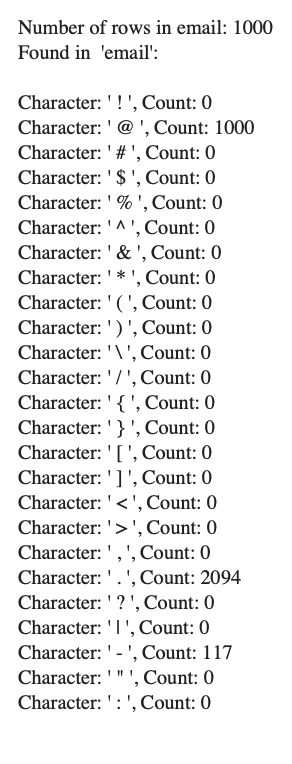
#### Setting the second parameter to 'True', additionally prints each matched pattern. This is useful forscanning the matches by eye, but there is a lot of output. Here is a  sample of the matches in 'email':
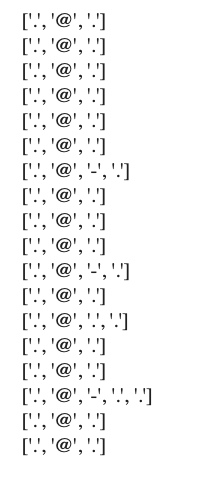

#### The function 'find_non_alpha_numeric()' is declared here
    - A. counts the total rows in the df
    - B. p1 =r'\W' is the regex pattern to match anyt non-alpha-numeric character
    - C. get the list of columns with '.columns'
    - D. loop through the columns
    - E. convert the column values to a list; these will be probed by regex
    - F. declare a list variable to hold matches to pattern p1
    - G. loop through the row values (items) in 'target_list'
    - H. pprobe each item ny regec for non-alpha-numeric characters with 're.findall'
    - I. If 're.findall' finds a match it is returned and stored in'matches';
    - J  If 'len(matches)' is greater than 0, there is a match, and the match is 
         appended to match_list
    - K Declare a dictionary of non-alpha-numeric characters to store their counts
    - L Populate the dictionary for the column being analyzed
    - M Report the summary result for the column
    - N Optionally, report the list of all matches (second parameter set to 'True' in function call)

In [140]:
# Declare a function. 
# Note: this is declared here, instead of at the top the notebook, to smooth presentation. 
# The function counts and reports occurences of non-alpha-numeric characters in a dataframe. 
# Spaces (' ') and reported as '_space_'
def find_non_alpha_numeric(dataFrame, report_all_matches = False):
    
    row_count = len(dataFrame)                            # A
    p1 =r'\W'                                             # B 
    columns = dataFrame.columns                           # C
    for column in columns:                                # D
        target_list = dataFrame[column].values.tolist()   # E
        match_list=[]                                     # F
        for item in target_list:                          # G
            matches = re.findall(p1, item)                # H
            if len(matches) > 0:                          # I
                match_list.append(matches)                # J

        match_dict = {                                    #K
        '!': 0,
        '@': 0,
        '#': 0,
        '$': 0,
        '%': 0,
        '^': 0,
        '&': 0,
        '*': 0,
        '(': 0,
        ')': 0,
        '\\': 0,
        '/': 0,
        '{': 0,
        '}': 0,
        '[': 0,
        ']': 0,
        '<': 0,
        '>': 0,
        ',': 0,
        '.': 0,
        '?': 0,
        '|': 0,
        '-': 0,
        '"': 0,
        ':': 0,
        '_space_': 0,
        'NaN':0
        }

        # populate non-alpha-numeric dictionary with counts; ignore single '"';
        # ' ' reported as '_space_'
        for list in match_list:                                 # L
            for j in list:
                if j == '"':
                    continue
                elif j == ' ':
                    match_dict['_space_'] += 1
                elif j == '':
                    match_dict['NaN'] += 1
                else:
                    match_dict[j] += 1

        # always report this information
        print (f"Number of rows in {column}: {row_count}")     # M
        match_dict_all_zero = True
        if any(x != 0 for x in match_dict.values()):
           match_dict_all_zero = False
           print(f"Found in  '{column}': \n")
           for key, value in match_dict.items():
               print(f"Character: ' {key} ', Count: {value}")     
        else:
            print(f"Found no '\\W' characters in {column}")

        if report_all_matches == False and match_dict_all_zero == False:  
            print()
        else:
            print("+"*50)
            print()

        # issue full report is parameter is set to 'True'
        index = 0
        if report_all_matches == True and match_dict_all_zero == False:   # N
            index += 1
            print(f"The matches in '{column}':")
            for matches in match_list:
                if len(matches) > 0:
                    print(matches)
            print("-"*50)
            print()

#### We tested the function on a synthetic dataframe 'non-alpha_num_df'
#### Here we create the synthetic test dataframe. it has columns and 27 rows. Each row has one cell with non-alpha-numeric characters. Each one contains 
- the non-alpha alone
- an alpha/non-alpha pair
- alpha/non-alpha/alpha triplet
- non-alpha/alpha pair
- non-alpha/non-alpha
#### The columns are named - #### COLUMNS: 'has_!','has_@' ..... 
#### Rows are:
- #### ROW 1 '! a! a!a !a !!','bbbbbb', 'cccccc', .....],
- #### ROW 2 ['aaaaaa',  '@ b@ b@b @b @@', 'cccccc', .....],
#### So we expect to find 6 '!'s in column 1, plus some spaces.
  

In [143]:
# create dataframe
values = [
['! a! a!a !a !!','bbbbbb', 'cccccc', 'dddddd','eeeeee','ffffff','gggggg','hhhhhh', 'iiiiii', 'jjjjjj', 'kkkkkk',  'llllll', 'mmmmmm', 'nnnnnn', 'oooooo', 'pppppp', 'qqqqqq', 'rrrrrr',  'ssssss', 'tttttt', 'uuuuuu', 'vvvvvv', 'wwwwww', 'xxxxxx', 'yyyyyy', 'zzzzzz', 'abc'],
['aaaaaa',  '@ b@ b@b @b @@', 'cccccc', 'dddddd', 'eeeeee', 'ffffff', 'gggggg', 'hhhhhh', 'iiiiii', 'jjjjjj',  'kkkkkk', 'llllll', 'mmmmmm', 'nnnnnn', 'oooooo', 'pppppp', 'qqqqqq', 'rrrrrr',  'ssssss', 'tttttt', 'uuuuuu', 'vvvvvv', 'wwwwww', 'xxxxxx', 'yyyyyy', 'zzzzzz', 'abc456'],
['aaaaaa', 'bbbbbb', '# c# c#c #d ##', 'dddddd','eeeeee', 'ffffff', 'gggggg', 'hhhhhh', 'iiiiii', 'jjjjjj',  'kkkkkk','llllll', 'mmmmmm', 'nnnnnn', 'oooooo', 'pppppp', 'qqqqqq', 'rrrrrr',  'ssssss', 'tttttt', 'uuuuuu', 'vvvvvv', 'wwwwww', 'xxxxxx', 'yyyyyy', 'zzzzzz', 'abc456'],
['aaaaaa', 'bbbbbb','cccccc', '$ d$ d$d $d $$', 'eeeeee', 'ffffff', 'gggggg', 'hhhhhh', 'iiiiii', 'jjjjjj',  'kkkkkk', 'llllll','mmmmmm', 'nnnnnn', 'oooooo', 'pppppp', 'qqqqqq', 'rrrrrr',  'ssssss', 'tttttt', 'uuuuuu', 'vvvvvv', 'wwwwww', 'xxxxxx', 'yyyyyy', 'zzzzzz', 'abc456'],
['aaaaaa', 'bbbbbb','cccccc', 'dddddd', '% e% e%e e% %%', 'ffffff', 'gggggg', 'hhhhhh', 'iiiiii', 'jjjjjj',  'kkkkkk', 'llllll', 'mmmmmm', 'nnnnnn', 'oooooo', 'pppppp', 'qqqqqq', 'rrrrrr',  'ssssss', 'tttttt', 'uuuuuu', 'vvvvvv', 'wwwwww', 'xxxxxx', 'yyyyyy', 'zzzzzz', 'abc456'],
['aaaaaa', 'bbbbbb','cccccc', 'dddddd', 'eeeeee', '^f f^f ^f ^^', 'gggggg', 'hhhhhh', 'iiiiii', 'jjjjjj', 'kkkkkk',   'llllll', 'mmmmmm', 'nnnnnn', 'oooooo', 'pppppp', 'qqqqqq', 'rrrrrr',  'ssssss', 'tttttt', 'uuuuuu', 'vvvvvv', 'wwwwww', 'xxxxxx', 'yyyyyy', 'zzzzzz', 'abc456'],
['aaaaaa', 'bbbbbb','cccccc', 'dddddd', 'eeeeee', 'ffffff', '& g& g&g &g &&', 'hhhhhh', 'iiiiii', 'jjjjjj',  'kkkkkk', 'llllll', 'mmmmmm', 'nnnnnn', 'oooooo', 'pppppp', 'qqqqqq', 'rrrrrr',  'ssssss', 'tttttt', 'uuuuuu', 'vvvvvv', 'wwwwww', 'xxxxxx', 'yyyyyy', 'zzzzzz', 'abc456'],
['aaaaaa', 'bbbbbb','cccccc', 'dddddd', 'eeeeee', 'ffffff', 'gggggg', '* h* h*h *h **', 'iiiiii', 'jjjjjj',  'kkkkkk', 'llllll', 'mmmmmm', 'nnnnnn', 'oooooo', 'pppppp', 'qqqqqq', 'rrrrrr',  'ssssss', 'tttttt', 'uuuuuu', 'vvvvvv', 'wwwwww', 'xxxxxx', 'yyyyyy', 'zzzzzz', 'abc456'],
['aaaaaa', 'bbbbbb','cccccc', 'dddddd', 'eeeeee', 'ffffff', 'gggggg', 'hhhhhh', '( i( i(i (i ((', 'jjjjjj',  'kkkkkk', 'llllll', 'mmmmmm', 'nnnnnn', 'oooooo', 'pppppp', 'qqqqqq', 'rrrrrr',  'ssssss', 'tttttt', 'uuuuuu', 'vvvvvv', 'wwwwww', 'xxxxxx', 'yyyyyy', 'zzzzzz', 'abc456'],
['aaaaaa', 'bbbbbb','cccccc', 'dddddd', 'eeeeee', 'ffffff', 'gggggg', 'hhhhhh', 'iiiiii', ') j) j)j )j ))',  'kkkkkk', 'llllll', 'mmmmmm', 'nnnnnn', 'oooooo', 'pppppp', 'qqqqqq', 'rrrrrr',  'ssssss', 'tttttt', 'uuuuuu', 'vvvvvv', 'wwwwww', 'xxxxxx', 'yyyyyy', 'zzzzzz', 'abc456'],
['aaaaaa', 'bbbbbb','cccccc', 'dddddd', 'eeeeee', 'ffffff', 'gggggg', 'hhhhhh', 'iiiiii', 'jjjjjj',  '\\ k\\ k\\k \\k \\\\', 'llllll', 'mmmmmm', 'nnnnnn', 'oooooo', 'pppppp', 'qqqqqq', 'rrrrrr',  'ssssss', 'tttttt', 'uuuuuu', 'vvvvvv', 'wwwwww', 'xxxxxx', 'yyyyyy', 'zzzzzz', 'abc456'],
['aaaaaa', 'bbbbbb','cccccc', 'dddddd', 'eeeeee', 'ffffff', 'gggggg', 'hhhhhh', 'iiiiii', 'jjjjjj',  'kkkkkk', '/ /l l/l /l //', 'mmmmmm', 'nnnnnn', 'oooooo', 'pppppp', 'qqqqqq', 'rrrrrr',  'ssssss', 'tttttt', 'uuuuuu', 'vvvvvv', 'wwwwww', 'xxxxxx', 'yyyyyy', 'zzzzzz', 'abc456'],
['aaaaaa', 'bbbbbb','cccccc', 'dddddd', 'eeeeee', 'ffffff', 'gggggg', 'hhhhhh', 'iiiiii', 'jjjjjj',  'kkkkkk', 'llllll', '{ {m m{m {m {{}}', 'nnnnnn', 'oooooo', 'pppppp', 'qqqqqq', 'rrrrrr', 'ssssss', 'tttttt', 'uuuuuu', 'vvvvvv', 'wwwwww', 'xxxxxx', 'yyyyyy', 'zzzzzz', 'abc456'],
['aaaaaa', 'bbbbbb','cccccc', 'dddddd', 'eeeeee', 'ffffff', 'gggggg', 'hhhhhh', 'iiiiii', 'jjjjjj',  'kkkkkk', 'llllll', 'mmmmmm', '} }n n}n }n }}', 'oooooo', 'pppppp', 'qqqqqq', 'rrrrrr',  'ssssss', 'tttttt', 'uuuuuu', 'vvvvvv', 'wwwwww','xxxxxx', 'yyyyyy', 'zzzzzz', 'abc456'],
['aaaaaa', 'bbbbbb','cccccc', 'dddddd', 'eeeeee', 'ffffff', 'gggggg', 'hhhhhh', 'iiiiii', 'jjjjjj',  'kkkkkk', 'llllll', 'mmmmmm', 'nnnnnn', '[ [o o[o [o [[', 'pppppp', 'qqqqqq', 'rrrrrr',  'ssssss', 'tttttt', 'uuuuuu', 'vvvvvv', 'wwwwww','xxxxxx', 'yyyyyy', 'zzzzzz', 'abc456'],
['aaaaaa', 'bbbbbb','cccccc', 'dddddd', 'eeeeee', 'ffffff', 'gggggg', 'hhhhhh', 'iiiiii', 'jjjjjj',  'kkkkkk', 'llllll', 'mmmmmm', 'nnnnnn', 'oooooo', '] ]p p]p ]p ]]', 'qqqqqq', 'rrrrrr',  'ssssss', 'tttttt', 'uuuuuu', 'vvvvvv', 'wwwwww','xxxxxx', 'yyyyyy', 'zzzzzz', 'abc456'],
['aaaaaa', 'bbbbbb','cccccc', 'dddddd', 'eeeeee', 'ffffff', 'gggggg', 'hhhhhh', 'iiiiii', 'jjjjjj',  'kkkkkk', 'llllll', 'mmmmmm', 'nnnnnn', 'oooooo', 'pppppp', '< <q q<q <q <<', 'rrrrrr',  'ssssss', 'tttttt', 'uuuuuu', 'vvvvvv', 'wwwwww','xxxxxx', 'yyyyyy', 'zzzzzz', 'abc456'],
['aaaaaa', 'bbbbbb','cccccc', 'dddddd', 'eeeeee', 'ffffff', 'gggggg', 'hhhhhh', 'iiiiii', 'jjjjjj',  'kkkkkk', 'llllll', 'mmmmmm', 'nnnnnn', 'oooooo', 'pppppp', 'qqqqqq', '> >r r>r >r >>',  'ssssss', 'tttttt', 'uuuuuu', 'vvvvvv', 'wwwwww','xxxxxx', 'yyyyyy', 'zzzzzz', 'abc456'],
['aaaaaa', 'bbbbbb','cccccc', 'dddddd', 'eeeeee', 'ffffff', 'gggggg', 'hhhhhh', 'iiiiii', 'jjjjjj',  'kkkkkk', 'llllll', 'mmmmmm', 'nnnnnn', 'oooooo', 'pppppp', 'qqqqqq', 'rrrrrr',  ', ,s s,s ,s ,,', 'tttttt', 'uuuuuu', 'vvvvvv', 'wwwwww','xxxxxx', 'yyyyyy', 'zzzzzz', 'abc456'],
['aaaaaa', 'bbbbbb','cccccc', 'dddddd', 'eeeeee', 'ffffff', 'gggggg', 'hhhhhh', 'iiiiii', 'jjjjjj',  'kkkkkk', 'llllll', 'mmmmmm', 'nnnnnn', 'oooooo', 'pppppp', 'qqqqqq', 'rrrrrr',  'ssssss', '. .t t.t .t ..', 'uuuuuu', 'vvvvvv', 'wwwwww','xxxxxx', 'yyyyyy', 'zzzzzz', 'abc456'],
['aaaaaa', 'bbbbbb','cccccc', 'dddddd', 'eeeeee', 'ffffff', 'gggggg', 'hhhhhh', 'iiiiii', 'jjjjjj',  'kkkkkk', 'llllll', 'mmmmmm', 'nnnnnn', 'oooooo', 'pppppp', 'qqqqqq', 'rrrrrr',  'ssssss', 'tttttt', '? ?u u?u ?u ??', 'vvvvvv', 'wwwwww','xxxxxx', 'yyyyyy', 'zzzzzz', 'abc456'],
['aaaaaa', 'bbbbbb','cccccc', 'dddddd', 'eeeeee', 'ffffff', 'gggggg', 'hhhhhh', 'iiiiii', 'jjjjjj',  'kkkkkk', 'llllll', 'mmmmmm', 'nnnnnn', 'oooooo', 'pppppp', 'qqqqqq', 'rrrrrr',  'ssssss', 'tttttt', 'uuuuuu', '| |v v|v |v ||', 'wwwwww','xxxxxx', 'yyyyyy', 'zzzzzz', 'abc456'],
['aaaaaa', 'bbbbbb','cccccc', 'dddddd', 'eeeeee', 'ffffff', 'gggggg', 'hhhhhh', 'iiiiii', 'jjjjjj',  'kkkkkk', 'llllll', 'mmmmmm', 'nnnnnn', 'oooooo', 'pppppp', 'qqqqqq', 'rrrrrr',  'ssssss', 'tttttt', 'uuuuuu', 'vvvvvv', '- -w w-w -w --','xxxxxx', 'yyyyyy', 'zzzzzz', 'abc456'],
['aaaaaa', 'bbbbbb','cccccc', 'dddddd', 'eeeeee', 'ffffff', 'gggggg', 'hhhhhh', 'iiiiii', 'jjjjjj',  'kkkkkk', 'llllll', 'mmmmmm', 'nnnnnn', 'oooooo', 'pppppp', 'qqqqqq', 'rrrrrr',  'ssssss', 'tttttt', 'uuuuuu', 'vvvvvv', 'wwwwww', '" "x x"x "x ""', 'yyyyyy', 'zzzzzz', 'abc456'],
['aaaaaa', 'bbbbbb','cccccc', 'dddddd', 'eeeeee', 'ffffff', 'gggggg', 'hhhhhh', 'iiiiii', 'jjjjjj',  'kkkkkk', 'llllll', 'mmmmmm', 'nnnnnn', 'oooooo', 'pppppp', 'qqqqqq', 'rrrrrr',  'ssssss', 'tttttt', 'uuuuuu', 'vvvvvv', 'wwwwww', 'xxxxxx', ': :y y:y y: ::', 'zzzzzz', 'abc456'],
['aaaaaa', 'bbbbbb','cccccc', 'dddddd', 'eeeeee', 'ffffff', 'gggggg', 'hhhhhh', 'iiiiii', 'jjjjjj',  'kkkkkk', 'llllll', 'mmmmmm', 'nnnnnn', 'oooooo', 'pppppp', 'qqqqqq', 'rrrrrr',  'ssssss', 'tttttt', 'uuuuuu', 'vvvvvv', 'wwwwww', 'xxxxxx', 'yyyyyy', ' z z zzz  ', 'abc456'],
['aaaaaa', 'bbbbbb','cccccc', 'dddddd', 'eeeeee', 'ffffff', 'gggggg', 'hhhhhh', 'iiiiii', 'jjjjjj',  'kkkkkk', 'llllll', 'mmmmmm', 'nnnnnn', 'oooooo', 'pppppp', 'qqqqqq', 'rrrrrr',  'ssssss', 'tttttt', 'uuuuuu', 'vvvvvv', 'wwwwww', 'xxxxxxx', 'yyyyyy',  'zzzzzz', 'abc456' ],
['aaaaaa', 'bbbbbb','cccccc', 'dddddd', 'eeeeee', 'ffffff', 'gggggg', 'hhhhhh', 'iiiiii', 'jjjjjj',  'kkkkkk', 'llllll', 'mmmmmm', 'nnnnnn', 'oooooo', 'pppppp', 'qqqqqq', 'rrrrrr',  'ssssss', 'tttttt', 'uuuuuu', 'vvvvvv', 'wwwwww', 'xxxxxx', 'yyyyyy', 'zzzzzz', 'abc456']]

column_names = [
'has_!',
'has_@', 
'has_#',
'has_$',
'has_%',
'has_^',
'has_&',
'has_*', 
'has_(',
'has_)',
'has_\\', 
'has_/' ,
'has_{',
'has_}',
'has_[',
'has_]',
'has_<',
'has_>',
'has_,',
'has_.',
'has_?',
'has_|',
'has_-',
'has_"',
'has_:',
'has_space',
'has_all_alpha_num'
]

find_non_alpha_numeric_test_df = pd.DataFrame(values, columns=column_names)
find_non_alpha_numeric_test_df.info()
find_non_alpha_numeric_test_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   has_!              28 non-null     object
 1   has_@              28 non-null     object
 2   has_#              28 non-null     object
 3   has_$              28 non-null     object
 4   has_%              28 non-null     object
 5   has_^              28 non-null     object
 6   has_&              28 non-null     object
 7   has_*              28 non-null     object
 8   has_(              28 non-null     object
 9   has_)              28 non-null     object
 10  has_\              28 non-null     object
 11  has_/              28 non-null     object
 12  has_{              28 non-null     object
 13  has_}              28 non-null     object
 14  has_[              28 non-null     object
 15  has_]              28 non-null     object
 16  has_<              28 non-null     object
 17 

,has_!,has_@,has_#,has_$,has_%,has_^,has_&,has_*,has_(,has_),...,has_>,"has_,",has_.,has_?,has_|,has_-,"has_""",has_:,has_space,has_all_alpha_num
0,! a! a!a !a !!,bbbbbb,cccccc,dddddd,eeeeee,ffffff,gggggg,hhhhhh,iiiiii,jjjjjj,...,rrrrrr,ssssss,tttttt,uuuuuu,vvvvvv,wwwwww,xxxxxx,yyyyyy,zzzzzz,abc
1,aaaaaa,@ b@ b@b @b @@,cccccc,dddddd,eeeeee,ffffff,gggggg,hhhhhh,iiiiii,jjjjjj,...,rrrrrr,ssssss,tttttt,uuuuuu,vvvvvv,wwwwww,xxxxxx,yyyyyy,zzzzzz,abc456
2,aaaaaa,bbbbbb,# c# c#c #d ##,dddddd,eeeeee,ffffff,gggggg,hhhhhh,iiiiii,jjjjjj,...,rrrrrr,ssssss,tttttt,uuuuuu,vvvvvv,wwwwww,xxxxxx,yyyyyy,zzzzzz,abc456
3,aaaaaa,bbbbbb,cccccc,$ d$ d$d $d $$,eeeeee,ffffff,gggggg,hhhhhh,iiiiii,jjjjjj,...,rrrrrr,ssssss,tttttt,uuuuuu,vvvvvv,wwwwww,xxxxxx,yyyyyy,zzzzzz,abc456
4,aaaaaa,bbbbbb,cccccc,dddddd,% e% e%e e% %%,ffffff,gggggg,hhhhhh,iiiiii,jjjjjj,...,rrrrrr,ssssss,tttttt,uuuuuu,vvvvvv,wwwwww,xxxxxx,yyyyyy,zzzzzz,abc456


#### run the test. We expect to find 6 '!'s in column 1 (called 'has_!', plus some spaces.

In [146]:
find_non_alpha_numeric(find_non_alpha_numeric_test_df, True)

Number of rows in has_!: 28
Found in  'has_!': 

Character: ' ! ', Count: 6
Character: ' @ ', Count: 0
Character: ' # ', Count: 0
Character: ' $ ', Count: 0
Character: ' % ', Count: 0
Character: ' ^ ', Count: 0
Character: ' & ', Count: 0
Character: ' * ', Count: 0
Character: ' ( ', Count: 0
Character: ' ) ', Count: 0
Character: ' \ ', Count: 0
Character: ' / ', Count: 0
Character: ' { ', Count: 0
Character: ' } ', Count: 0
Character: ' [ ', Count: 0
Character: ' ] ', Count: 0
Character: ' < ', Count: 0
Character: ' > ', Count: 0
Character: ' , ', Count: 0
Character: ' . ', Count: 0
Character: ' ? ', Count: 0
Character: ' | ', Count: 0
Character: ' - ', Count: 0
Character: ' " ', Count: 0
Character: ' : ', Count: 0
Character: ' _space_ ', Count: 4
Character: ' NaN ', Count: 0
++++++++++++++++++++++++++++++++++++++++++++++++++

The matches in 'has_!':
['!', ' ', '!', ' ', '!', ' ', '!', ' ', '!', '!']
--------------------------------------------------

Number of rows in has_@: 28
Found i

### Run 'find_non_alpha_numeric(contact_info_df_edit, False)' We set the parameter to 'False' to avoid long output. 

In [149]:
#check for non-alpha numerics
#find_non_alpha_numeric(True)
find_non_alpha_numeric(contact_info_df_edit, False)

Number of rows in contact_id: 1000
Found no '\W' characters in contact_id
++++++++++++++++++++++++++++++++++++++++++++++++++

Number of rows in name: 1000
Found in  'name': 

Character: ' ! ', Count: 0
Character: ' @ ', Count: 0
Character: ' # ', Count: 0
Character: ' $ ', Count: 0
Character: ' % ', Count: 0
Character: ' ^ ', Count: 0
Character: ' & ', Count: 0
Character: ' * ', Count: 0
Character: ' ( ', Count: 0
Character: ' ) ', Count: 0
Character: ' \ ', Count: 0
Character: ' / ', Count: 0
Character: ' { ', Count: 0
Character: ' } ', Count: 0
Character: ' [ ', Count: 0
Character: ' ] ', Count: 0
Character: ' < ', Count: 0
Character: ' > ', Count: 0
Character: ' , ', Count: 0
Character: ' . ', Count: 0
Character: ' ? ', Count: 0
Character: ' | ', Count: 0
Character: ' - ', Count: 0
Character: ' " ', Count: 0
Character: ' : ', Count: 0
Character: ' _space_ ', Count: 1000
Character: ' NaN ', Count: 0

Number of rows in email: 1000
Found in  'email': 

Character: ' ! ', Count: 0
Charac

#### Extract first and last names into new columns, and check result

In [152]:
# Create a "first"name" and "last_name" column with the first and last names from the "name" column. 
p1 = r'(^\w+\b)'
contact_info_df_edit["first_name"] = contact_info_df_edit["name"].str.extract(p1)
p2 = r'(\b\w+$)'
contact_info_df_edit["last_name"] = contact_info_df_edit["name"].str.extract(p2)
contact_info_df_edit.head()

,contact_id,name,email,first_name,last_name
0,4661,Cecilia Velasco,cecilia.velasco@rodrigues.fr,Cecilia,Velasco
1,3765,Mariana Ellis,mariana.ellis@rossi.org,Mariana,Ellis
2,4187,Sofie Woods,sofie.woods@riviere.com,Sofie,Woods
3,4941,Jeanette Iannotti,jeanette.iannotti@yahoo.com,Jeanette,Iannotti
4,2199,Samuel Sorgatz,samuel.sorgatz@gmail.com,Samuel,Sorgatz


#### Refine 'contact_info_df_edit' by removing the 'name' colume with 'drop()

In [155]:
# Drop the contact_name column
contact_info_df_edit.drop('name', axis=1, inplace=True)
contact_info_df_edit.head()

,contact_id,email,first_name,last_name
0,4661,cecilia.velasco@rodrigues.fr,Cecilia,Velasco
1,3765,mariana.ellis@rossi.org,Mariana,Ellis
2,4187,sofie.woods@riviere.com,Sofie,Woods
3,4941,jeanette.iannotti@yahoo.com,Jeanette,Iannotti
4,2199,samuel.sorgatz@gmail.com,Samuel,Sorgatz


#### Further refine 'contact_info_df' by reordering the columns and renaming the clean df to 'contacts_df_clean_2'

In [158]:
# Reorder the columns
contacts_df_clean_2 = contact_info_df_edit[['contact_id','first_name','last_name','email']]
contacts_df_clean_2.head()

,contact_id,first_name,last_name,email
0,4661,Cecilia,Velasco,cecilia.velasco@rodrigues.fr
1,3765,Mariana,Ellis,mariana.ellis@rossi.org
2,4187,Sofie,Woods,sofie.woods@riviere.com
3,4941,Jeanette,Iannotti,jeanette.iannotti@yahoo.com
4,2199,Samuel,Sorgatz,samuel.sorgatz@gmail.com


In [160]:
#### Check data types ith ',info()'

In [162]:
contacts_df_clean_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   contact_id  1000 non-null   object
 1   first_name  1000 non-null   object
 2   last_name   1000 non-null   object
 3   email       1000 non-null   object
dtypes: object(4)
memory usage: 31.4+ KB


In [164]:
#change the contact_id to int
contacts_df_clean_2['contact_id'] = contacts_df_clean_2['contact_id'].astype(int)

In [166]:
# Check the datatypes one more time before exporting as CSV file.
contacts_df_clean_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   contact_id  1000 non-null   int64 
 1   first_name  1000 non-null   object
 2   last_name   1000 non-null   object
 3   email       1000 non-null   object
dtypes: int64(1), object(3)
memory usage: 31.4+ KB


In [168]:
# Export the DataFrame as a CSV file. 
contacts_df_clean_2.to_csv("Resources/contacts_2.csv", encoding='utf8', index=False)

#### Therer are many email service providers. We calculate the market share of each email service provider in this data 

In [172]:
# make a working copy of the dataframe
contacts_df_clean_2_working = contacts_df_clean_2.copy()

In [174]:
# extract the emai service provider
p4 = r'@(\w+-?\w+)\.'
contacts_df_clean_2_working['mail_providers'] = contacts_df_clean_2["email"].str.extract(p4)
contacts_df_clean_2_working.head()

,contact_id,first_name,last_name,email,mail_providers
0,4661,Cecilia,Velasco,cecilia.velasco@rodrigues.fr,rodrigues
1,3765,Mariana,Ellis,mariana.ellis@rossi.org,rossi
2,4187,Sofie,Woods,sofie.woods@riviere.com,riviere
3,4941,Jeanette,Iannotti,jeanette.iannotti@yahoo.com,yahoo
4,2199,Samuel,Sorgatz,samuel.sorgatz@gmail.com,gmail


In [176]:
# count the instances of each service proider
provider_count = contacts_df_clean_2_working['mail_providers'].value_counts()
print(provider_count[:30])
type(provider_count)

mail_providers
hotmail         119
yahoo           111
gmail           104
gmx              17
outlook          15
web              14
libero           11
aol               9
laboratorios      8
live              8
voila             8
tele2             8
googlemail        7
tiscali           6
sfr               6
ifrance           6
industrias        6
proyectos         6
despacho          5
tin               5
tim               5
free              5
grupo             5
laposte           4
green             4
poste             4
dbmail            3
vodafone          3
noos              3
martin            3
Name: count, dtype: int64


pandas.core.series.Series

#### The market share of service providers with more than 5 customers in this data ia ploted, and saved. 

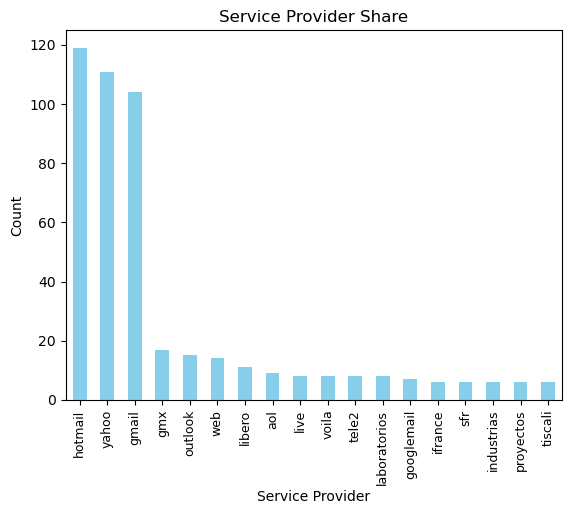

In [179]:
provider_count_top = provider_count[provider_count > 5]
ax = provider_count_top.plot(kind='bar', color='skyblue')
labels = ['hotmail' ,'yahoo' ,'gmail' ,'gmx' ,'outlook' ,'web' ,'libero' ,'aol' ,'live' ,'voila' ,'tele2' ,'laboratorios' ,'googlemail' ,'ifrance' ,'sfr' ,'industrias' ,'proyectos' ,'tiscali']
_ = ax.set_xticklabels(labels, rotation = 90, size = 9)
plt.xlabel('Service Provider')
plt.ylabel('Count')
plt.title('Service Provider Share')
plt.show()

#### If this data is represetative, hotmail, yahoo and gmail together provide email to about a third of all customers. Service to the remaining two thirds of curtomers is supplied by large number of smaller providers. About  email addresses are have 'service providers' that occur less han five times. These are probably aliases.   

In [391]:
plt.savefig('Service Provider Share.png')

<Figure size 640x480 with 0 Axes>